In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import (RandomFlip, RandomRotation, RandomCrop, RandomZoom, RandomContrast, Conv2D, MaxPool2D, Flatten, Dense, Input)
from tensorflow.keras import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datadir = '/content/drive/MyDrive/dataset'
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(datadir, label_mode='categorical',
                                                                                          validation_split=0.3,
                                                                                          subset="training",
                                                                                          seed=0,
                                                                                          image_size=(224, 224),
                                                                                          batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(datadir,label_mode='categorical',
                                                                                      validation_split=0.3,
                                                                                      subset="validation",
                                                                                      seed=0,
                                                                                      image_size=(224, 224),
                                                                                      batch_size=batch_size)



Found 1125 files belonging to 4 classes.
Using 788 files for training.
Found 1125 files belonging to 4 classes.
Using 337 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cloudy', 'rain', 'shine', 'sunrise']


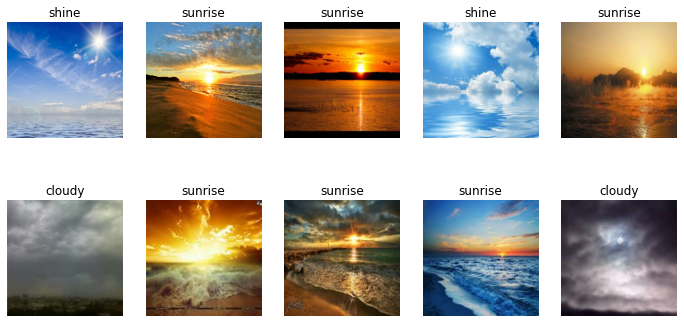

In [ ]:
import matplotlib.pyplot as plt
## train plot
plt.figure(figsize=(12, 6))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

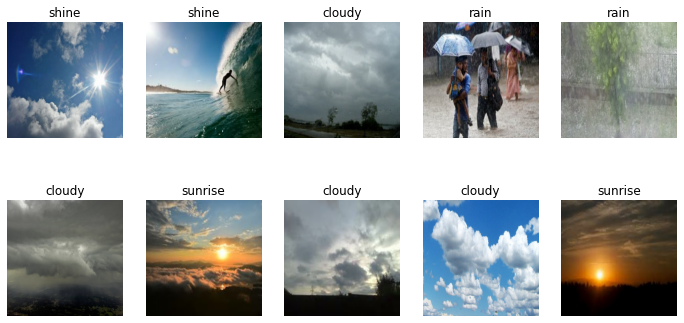

In [ ]:
##test plot

plt.figure(figsize=(12, 6))
for images, labels in val_ds.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE


train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model_1 = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape = (224,224,3)),
  
  Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=2,strides=2),
  Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=2, strides=2),
  Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=2,strides=2),
  Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=2,strides=2),
  Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=2,strides=2),
  Flatten(),
  Dense(units=4096,activation='relu'),
  Dense(units=4096,activation='relu'),
  Dense(units=4, activation='softmax')
])

model_2 = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape = (224,224,3)),
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(0.2),
  RandomContrast(0.1),
  RandomZoom(0.3),
  Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2), strides=(2,2)),
  Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Flatten(),
  Dense(units=4096,activation='relu'),
  Dense(units=4096,activation='relu'),
  Dense(units=4, activation='softmax')
])

model_3 = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape = (224,224,3)),
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(0.2),
  RandomContrast(0.1),
  RandomZoom(0.3),
  Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2), strides=(2,2)),
  Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2,2),strides=(2,2)),
  Flatten(),
  Dense(units=4096,activation='relu'),
  Dense(units=4096,activation='relu'),
  Dense(units=4, activation='softmax')
])


In [ ]:
optimzer = tf.keras.optimizers.Adam(0.001)

model_1.compile(optimizer=optimzer, loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 56, 56, 256)      

In [ ]:

callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/transfer_learning_weights.h5',monitor='val_acc',save_best_only=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", mode = "min", patience=5)]

history_1 = model_1.fit(train_ds, validation_data  = val_ds , epochs=100, callbacks=callbacks)



Epoch 1/100
29/29 [==============================] - 22s 505ms/step - loss: 1.5746 - accuracy: 0.3689 - val_loss: 1.7872 - val_accuracy: 0.3911 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 12s 403ms/step - loss: 0.9428 - accuracy: 0.5689 - val_loss: 0.8684 - val_accuracy: 0.6044 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 12s 403ms/step - loss: 0.7797 - accuracy: 0.6667 - val_loss: 0.6376 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 12s 404ms/step - loss: 0.5508 - accuracy: 0.8078 - val_loss: 1.1845 - val_accuracy: 0.6178 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 12s 402ms/step - loss: 0.5888 - accuracy: 0.7789 - val_loss: 0.7917 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 12s 403ms/step - loss: 0.5161 - accuracy: 0.8156 - val_loss: 0.4612 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 12s 4

In [ ]:
# Saving model and History
model_1.save('/content/drive/MyDrive/dataset/model_1m.h5')

import pickle
with open('/content/drive/MyDrive/dataset/model_1h.pkl', 'wb+') as h:
 	pickle.dump(history_1,h)


INFO:tensorflow:Assets written to: ram://aa7b1364-031a-4995-93bc-96b82a71928c/assets


In [ ]:
optimzer = tf.keras.optimizers.Adam(0.001)


model_2.compile(optimizer=optimzer, loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)      0         
 rast)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 224, 224, 64)     

In [ ]:
optimzer = tf.keras.optimizers.Adam(0.001)


model_2.compile(optimizer=optimzer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/transfer_learning_weights2.h5',monitor='val_acc',save_best_only=True),
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", mode = "min", patience=5)]

history_2 = model_2.fit(train_ds, validation_data  = val_ds, epochs=100, callbacks=callbacks)

Epoch 1/100
29/29 [==============================] - 15s 425ms/step - loss: 2.0146 - accuracy: 0.3456 - val_loss: 1.1727 - val_accuracy: 0.5022 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 12s 417ms/step - loss: 0.8855 - accuracy: 0.5856 - val_loss: 0.8327 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 12s 417ms/step - loss: 0.8473 - accuracy: 0.6089 - val_loss: 0.7904 - val_accuracy: 0.7156 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 12s 417ms/step - loss: 0.7096 - accuracy: 0.7056 - val_loss: 0.5814 - val_accuracy: 0.7378 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 12s 416ms/step - loss: 0.5881 - accuracy: 0.7389 - val_loss: 0.5753 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 12s 416ms/step - loss: 0.5818 - accuracy: 0.7378 - val_loss: 0.8218 - val_accuracy: 0.5867 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 12s 4

In [ ]:
optimzer = tf.keras.optimizers.Adam(0.001)


model_3.compile(optimizer=optimzer, loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_contrast_1 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 224, 224, 64)     

In [ ]:
optimzer = tf.keras.optimizers.Adam(0.001)


model_3.compile(optimizer=optimzer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/transfer_learning_weights3.h5',monitor='val_acc',save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode = 'min'), 
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", mode = "min", patience=5)]

history_3 = model_3.fit(train_ds, validation_data  = val_ds, epochs=100, callbacks=callbacks)

Epoch 1/100
29/29 [==============================] - 14s 422ms/step - loss: 1.6065 - accuracy: 0.3511 - val_loss: 1.0619 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 12s 414ms/step - loss: 1.1202 - accuracy: 0.5189 - val_loss: 0.8838 - val_accuracy: 0.6356 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 12s 414ms/step - loss: 0.9210 - accuracy: 0.5500 - val_loss: 0.8124 - val_accuracy: 0.5733 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 12s 413ms/step - loss: 0.8200 - accuracy: 0.5811 - val_loss: 0.8514 - val_accuracy: 0.5111 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 12s 412ms/step - loss: 0.8212 - accuracy: 0.5600 - val_loss: 0.8886 - val_accuracy: 0.5733 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 12s 412ms/step - loss: 0.8593 - accuracy: 0.5622 - val_loss: 0.8606 - val_accuracy: 0.5778 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 12s 4

In [ ]:
def plot_accuray(history):
  plt.figure(figsize=(12, 8))
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'], color='g', label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], color='b', label='Val Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig('Model Accuracy.png')
  plt.savefig('Model Accuracy.pdf')
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(12, 8))
  plt.title('Model Loss')
  plt.plot(history.history['loss'], color='g', label='Train Loss')
  plt.plot(history.history['val_loss'], color='b', label='Val Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.savefig('Model Loss.png')
  plt.savefig('Model Loss.pdf')
  plt.show()

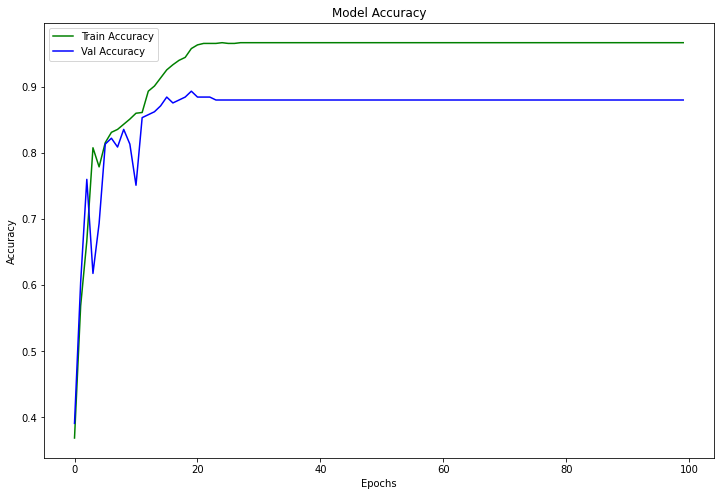

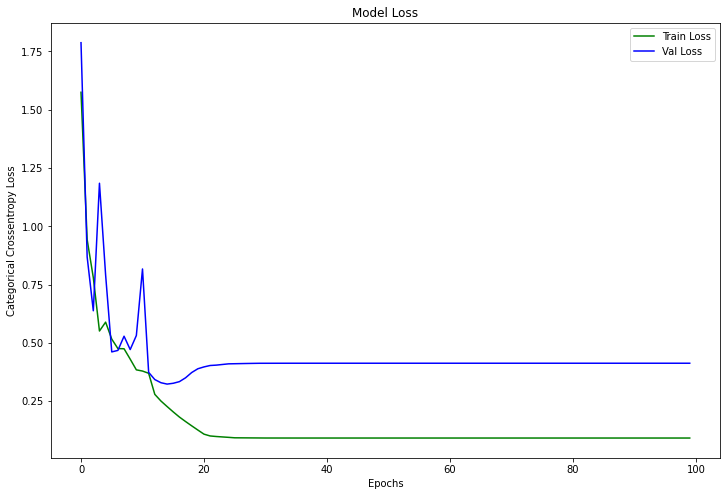

In [ ]:
plot_accuray(history_1)
plot_loss(history_1)


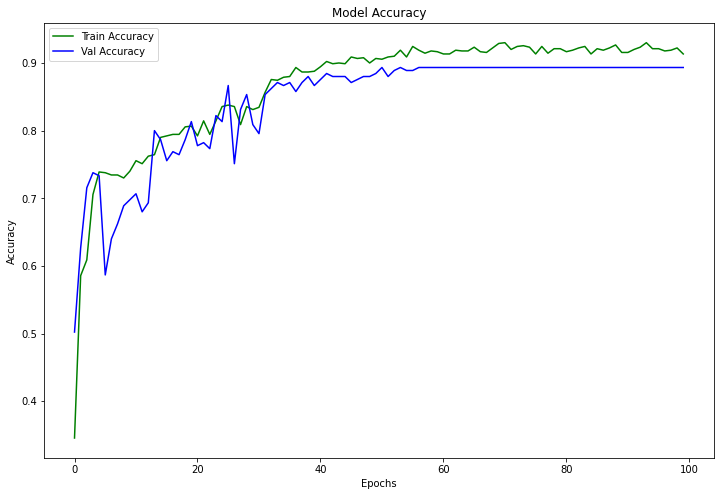

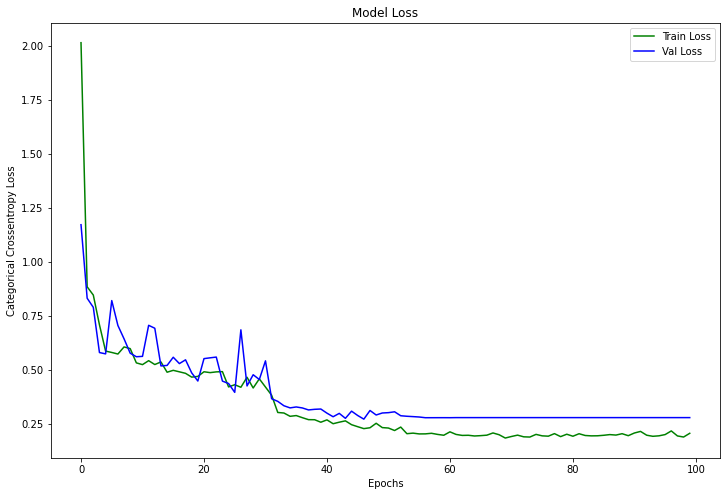

In [ ]:

plot_accuray(history_2)
plot_loss(history_2)


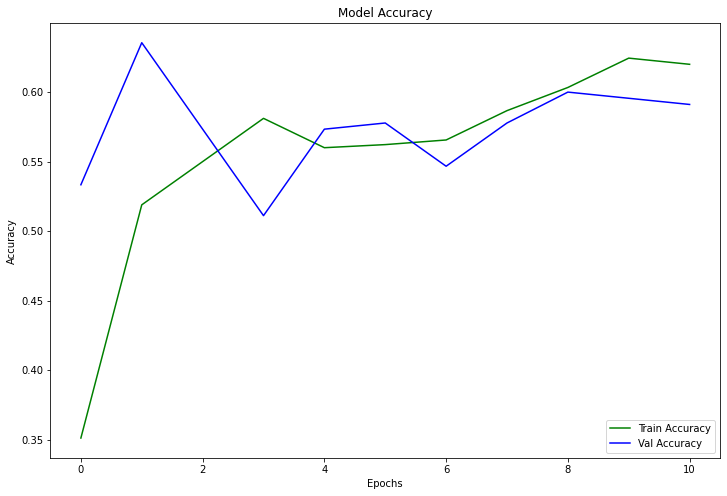

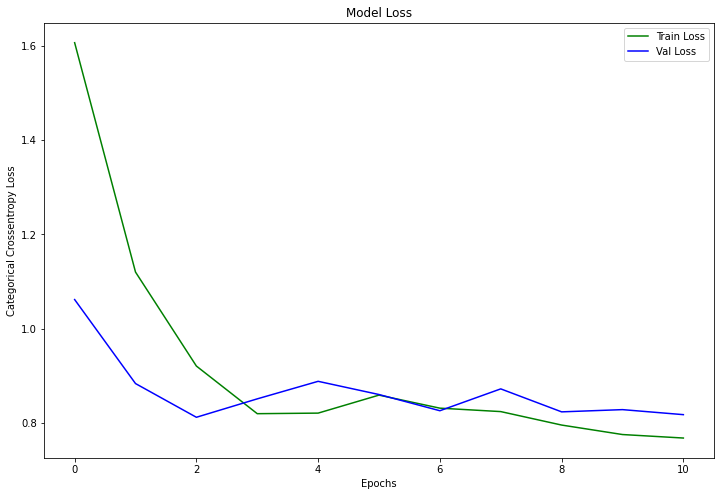

In [ ]:

plot_accuray(history_3)
plot_loss(history_3)